In [1]:
import pandas as pd

df=pd.read_csv('data.csv')
df.head()

,X1,X2,Y
0,54,96,0
1,72,25,1
2,49,99,0
3,11,61,0
4,86,31,1


In [2]:
#converting to list
X1 = df['X1'].values.tolist()
X2 = df['X2'].values.tolist()
Y = df['Y'].values.tolist()

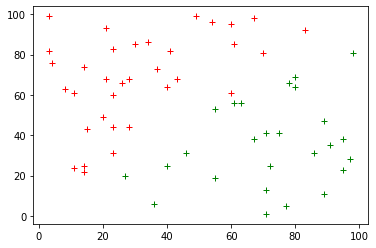

In [3]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i],'r+')
    else:
        plt.plot(X1[i],X2[i],'g+')
plt.show()

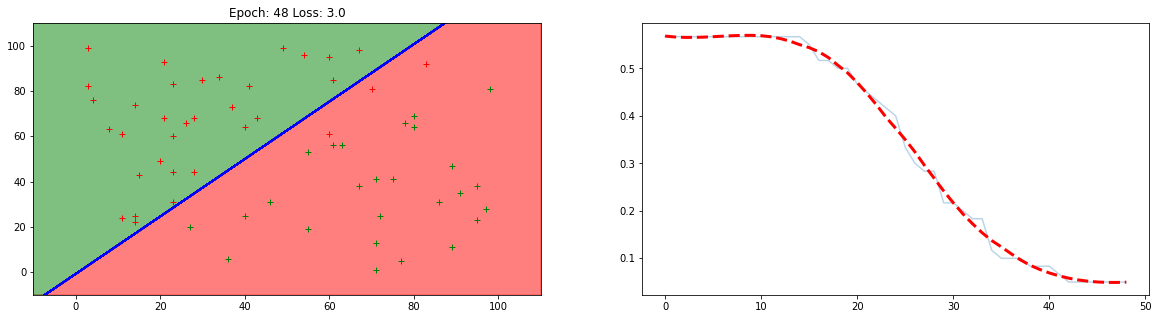

In [ ]:
## building a perceptron
import random
import math
from IPython import display
from scipy.signal import savgol_filter

W=[random.random(), random.random()]
b=random.random()

lr=0.00001
theta =0.5

epoch=0
count=0

loss = []

while count < len(X1):
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1/len(X1)*total_error)
    
    grf = plt.figure(figsize=(20,5))
    ax = grf.add_subplot(1,2,1)
    display.clear_output(wait=True)
    plt.subplot(1,2,1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "r+")
        else:
            plt.plot(X1[i], X2[i], "g+")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]

        slope = -yintr/xintr
        xx = plt.xlim()
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')

    ax.plot(xx,yeq, 'b-')
    ax.fill_between(xx, yeq, plt.xlim()[0], color='r', alpha= 0.5)
    ax.fill_between(xx, yeq, plt.ylim()[1], color='g', alpha = 0.5)
    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        avg = savgol_filter(loss, 21, 3) # window size 51, polynomial order 3
        plt.plot(avg, 'r--', lw=3)

    plt.show()
            
    epoch += 1

    